In [34]:
from pathlib import Path
import pickle
from models import CTCNet
import torch
import numpy as np
import matplotlib.pyplot as plt

In [35]:
results_path = "/Users/patmccarthy/Documents/thalamocortex/results/model0_05_01_24"

In [36]:
# learning progress
with open(Path(f"{results_path}", "learning.pkl"), "rb") as handle:
    learning = pickle.load(handle)

In [37]:
# hyperparams
with open(Path(f"{results_path}", "hyperparams.pkl"), "rb") as handle:
    hyperparams = pickle.load(handle)

In [38]:
# model
model = CTCNet(input_size=hyperparams["input_size"],
                output_size=hyperparams["output_size"],
                ctx_layer_size=hyperparams["ctx_layer_size"],
                thal_layer_size=hyperparams["thal_layer_size"],
                thalamocortical_type=hyperparams["thalamocortical_type"],
                thal_reciprocal=hyperparams["thal_reciprocal"],
                thal_to_readout=hyperparams["thal_to_readout"], 
                thal_per_layer=hyperparams["thal_per_layer"])
model_weights = torch.load(Path(f"{results_path}", "model.pth"))
model.load_state_dict(model_weights)

<All keys matched successfully>

Plot learning curve

In [39]:
train_losses = np.array(learning["train_losses"])
train_losses_flat = train_losses.flatten(order="C")
val_losses = np.array(learning["val_losses"])
val_losses_flat = val_losses.flatten(order="C")
val_losses_flat.shape
train_losses_flat.shape
train_losses_ax = np.arange(0, len(train_losses_flat))
val_losses_ax = np.arange(0, len(train_losses_flat), len(train_losses_flat)/len(val_losses_flat))

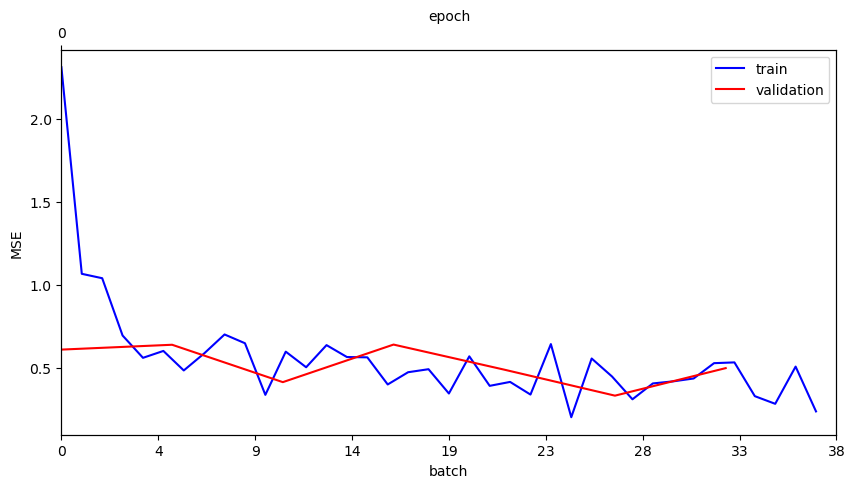

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot(train_losses_ax, train_losses_flat, c="b", label="train")
ax1.plot(val_losses_ax, val_losses_flat, c="r", label="validation")
# ax.set_ylim(0, 1)
ax1.set_xlim(0, len(train_losses_flat))
ax1.set_ylabel("cross-entropy")
ax1.set_xlabel("batch")
x_tick_locs = np.linspace(0, len(train_losses_flat), 9)
ax1.set_xticks(x_tick_locs)
ax1.set_xticklabels(x_tick_locs.astype(int), size=10)
ax2 = ax1.twiny()
new_tick_step = 20
new_tick_locs = np.arange(0, len(train_losses_flat)+ 1, (new_tick_step * len(train_losses_flat))// train_losses.shape[0])
ax2.set_xticks(new_tick_locs)
ax2.set_xticklabels(np.arange(0, train_losses.shape[0]+1, new_tick_step), size=10)
ax2.set_xlabel("epoch")
ax1.legend()